In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SENTINELS = {'PRECIP':['NA'],'EVAP':['NA'],'TMAX':['NA'],'TMIN':['NA']}

In [3]:
df0=pd.read_csv('aguaprieta.txt',skiprows=0,sep='\s+', na_values=SENTINELS)

In [4]:
df = pd.DataFrame(df0)

In [5]:
df['FECHAS'] = pd.to_datetime(df0['FECHA'], dayfirst=True)



In [6]:
df.dtypes

FECHA             object
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAS    datetime64[ns]
dtype: object

In [7]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN,FECHAS
0,01/02/1961,0.0,NaN,19.5,2.0,1961-02-01
1,02/02/1961,0.0,NaN,20.0,2.5,1961-02-02
2,03/02/1961,0.0,2.7,21.5,1.8,1961-02-03
3,04/02/1961,0.0,3.0,16.7,1.0,1961-02-04
4,05/02/1961,0.0,1.3,11.4,4.0,1961-02-05


In [8]:
df0['Año'] = df0['FECHAS'].dt.year
df0['Mes'] = df0['FECHAS'].dt.month

In [9]:
df0.head()


,FECHA,PRECIP,EVAP,TMAX,TMIN,FECHAS,Año,Mes
0,01/02/1961,0.0,NaN,19.5,2.0,1961-02-01,1961,2
1,02/02/1961,0.0,NaN,20.0,2.5,1961-02-02,1961,2
2,03/02/1961,0.0,2.7,21.5,1.8,1961-02-03,1961,2
3,04/02/1961,0.0,3.0,16.7,1.0,1961-02-04,1961,2
4,05/02/1961,0.0,1.3,11.4,4.0,1961-02-05,1961,2


In [10]:
df = pd.DataFrame(df0)
prom = df0['TMAX'].mean()

In [11]:

PrecipMensual = [df0['PRECIP'][df0['Mes']==[i+1]].mean() for i in range(0,12)]
PrecipAnual = [df0['PRECIP'][df0['Año']==[i+1]].sum() for i in range(1961,2011)] 
TmaxMensual = [df0['TMAX'][df0['Mes']==[i+1]].mean()  for i in range(0,12)] 
TMINMensual = [df0['TMIN'][df0['Mes']==[i+1]].mean()  for i in range(0,12)] 
TmaxAnual = [df0['TMAX'][df0['Año']==[i+1]].mean()  for i in range(1961,2011)] 
TminAnual = [df0['TMIN'][df0['Año']==[i+1]].mean()  for i in range(1961,2011)] 



In [12]:
Meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

In [13]:
años=[]

for i in  range (50):

    valor= 1961 + i

    años.append (valor)

In [14]:
print(años)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [15]:
print(PrecipMensual[6])

2.952941176470588


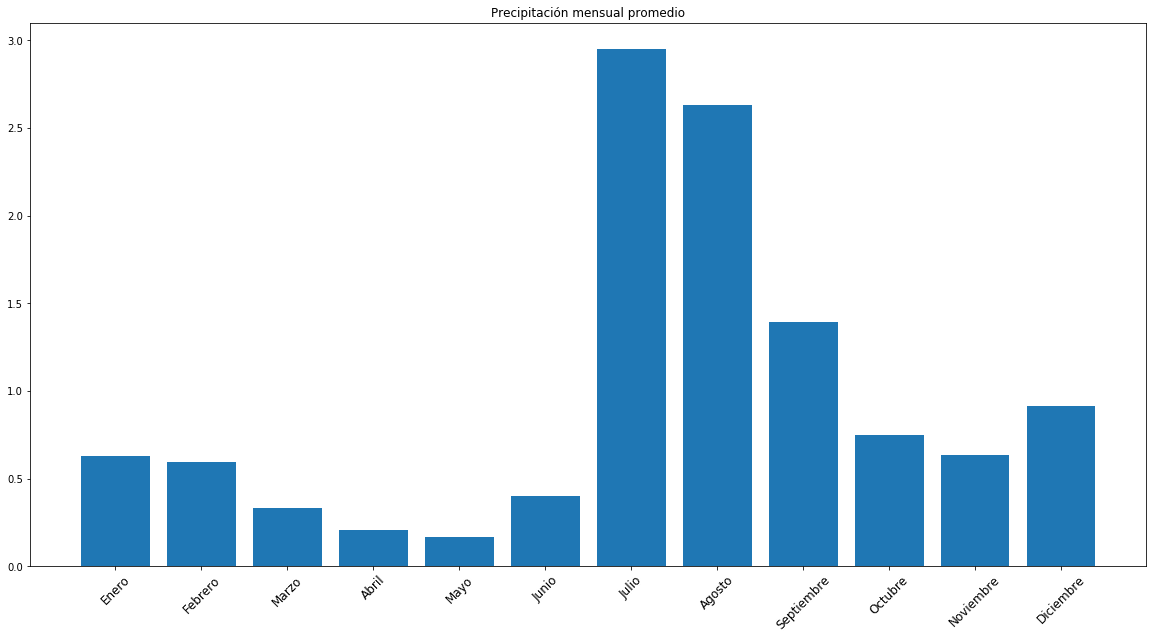

In [16]:
x=Meses
n=np.arange(len(x))
y=PrecipMensual

plt.figure(figsize=(20,10))
plt.bar(n, y)
plt.xticks(n,x,size="large",color="k",rotation="45")
plt.title("Precipitación mensual promedio")
plt.savefig("precip_mensual", plt=2000)
plt.show()

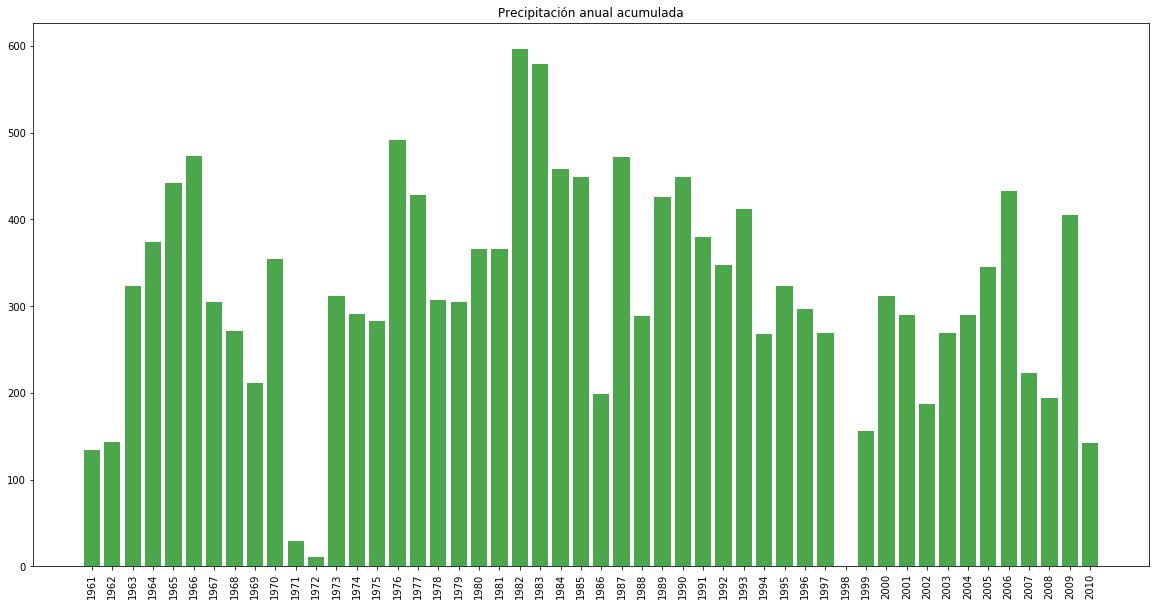

In [17]:
from matplotlib import pyplot as plt

x=años
nx=np.arange(len(x))
y=PrecipAnual
ny=np.arange(len(y))


plt.figure(figsize=(20,10))
plt.bar(x, y,color="green",alpha=.7,width=.8)
plt.xticks(x,size="medium",color="k",rotation="90")
plt.title("Precipitación anual acumulada")
plt.show()



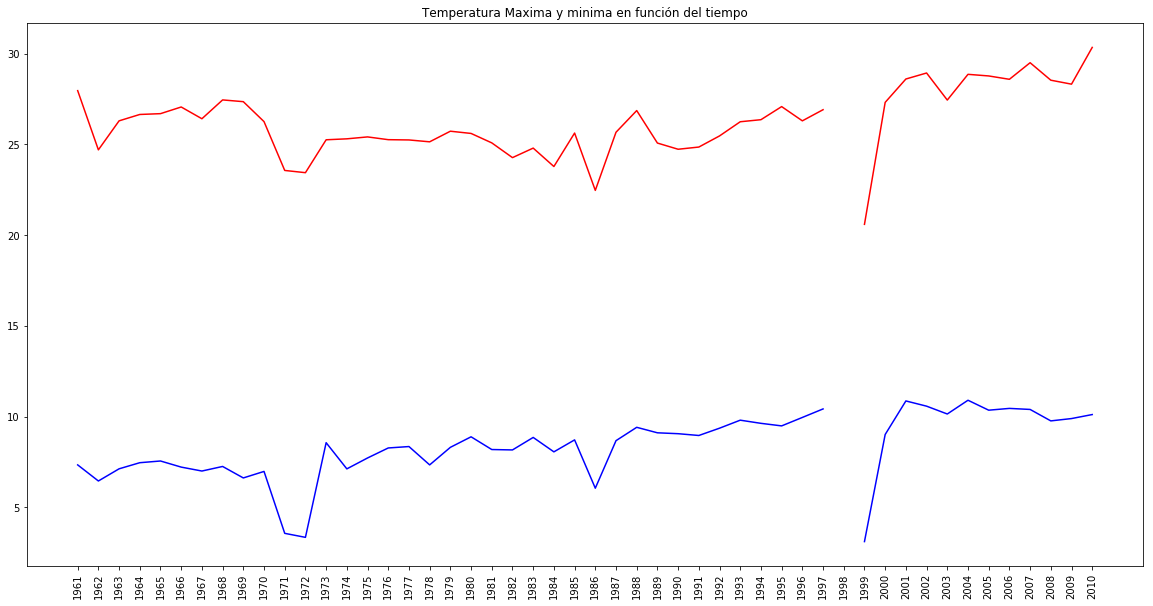

In [18]:

x=años
nx=np.arange(len(x))
y=TmaxAnual
ny=np.arange(len(y))
z=TminAnual

plt.figure(figsize=(20,10))
plt.plot(x, y,color="red")
plt.plot(x, z,color="blue")
plt.xticks(x,size="medium",color="k",rotation="90")
plt.title("Temperatura Maxima y minima en función del tiempo")
plt.savefig("precip_mensual", plt=3000)
plt.show()




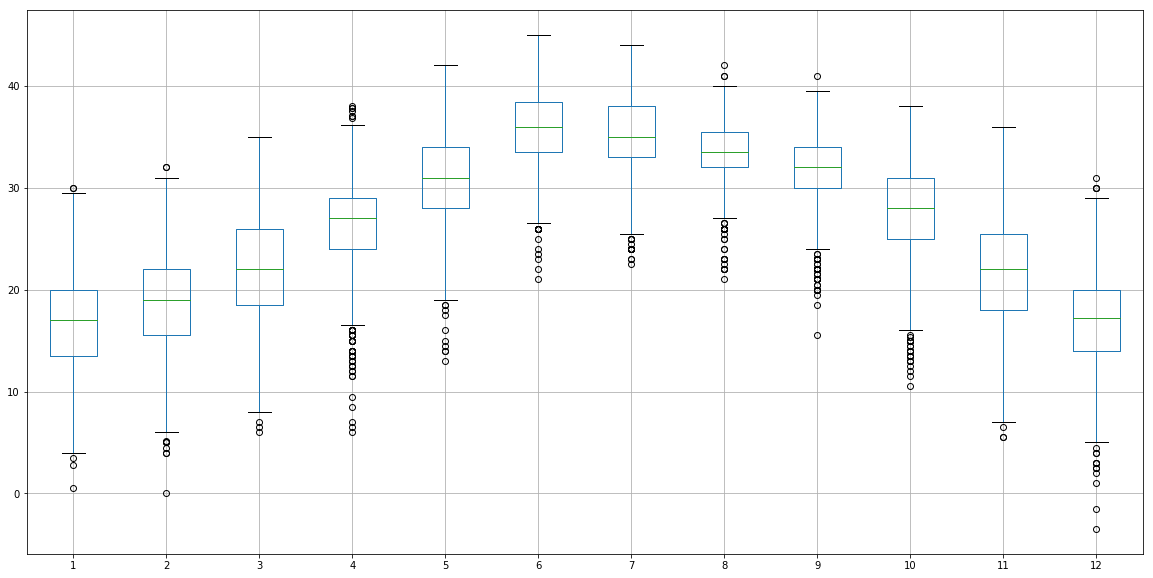

In [19]:


TmaxMeses = df.filter(['TMAX','Mes'])
TmaxMeses = df.pivot(columns='Mes',values='TMAX')
TminMeses = df.filter(['TMIN','Mes'])
TminMeses = df.pivot(columns='Mes',values='TMIN')

TmaxMeses.boxplot(figsize=(20,10))


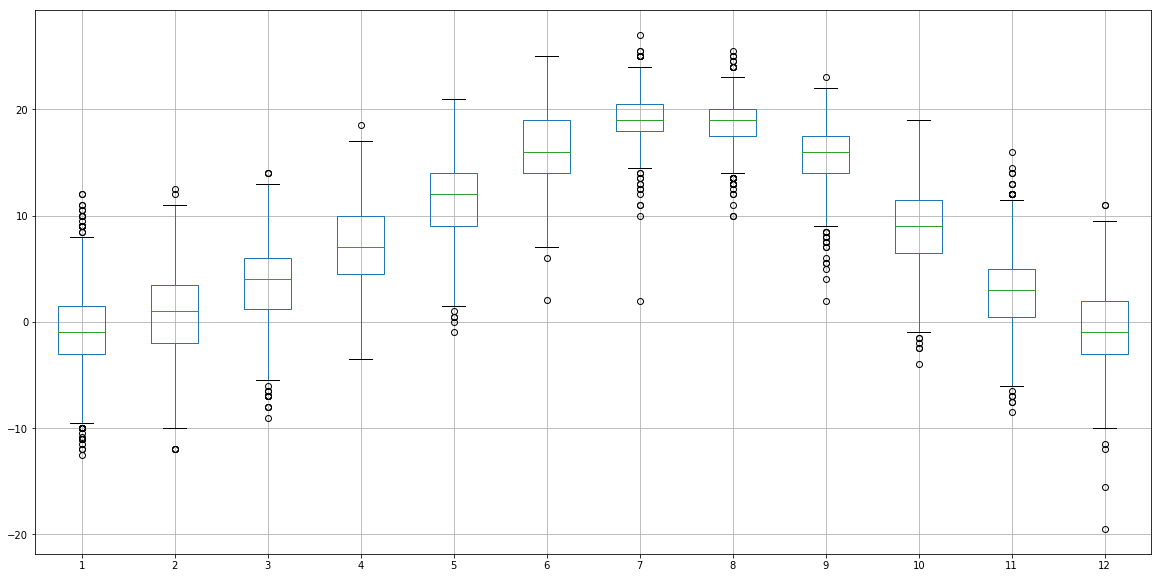

In [20]:

TminMeses.boxplot(figsize=(20,10))

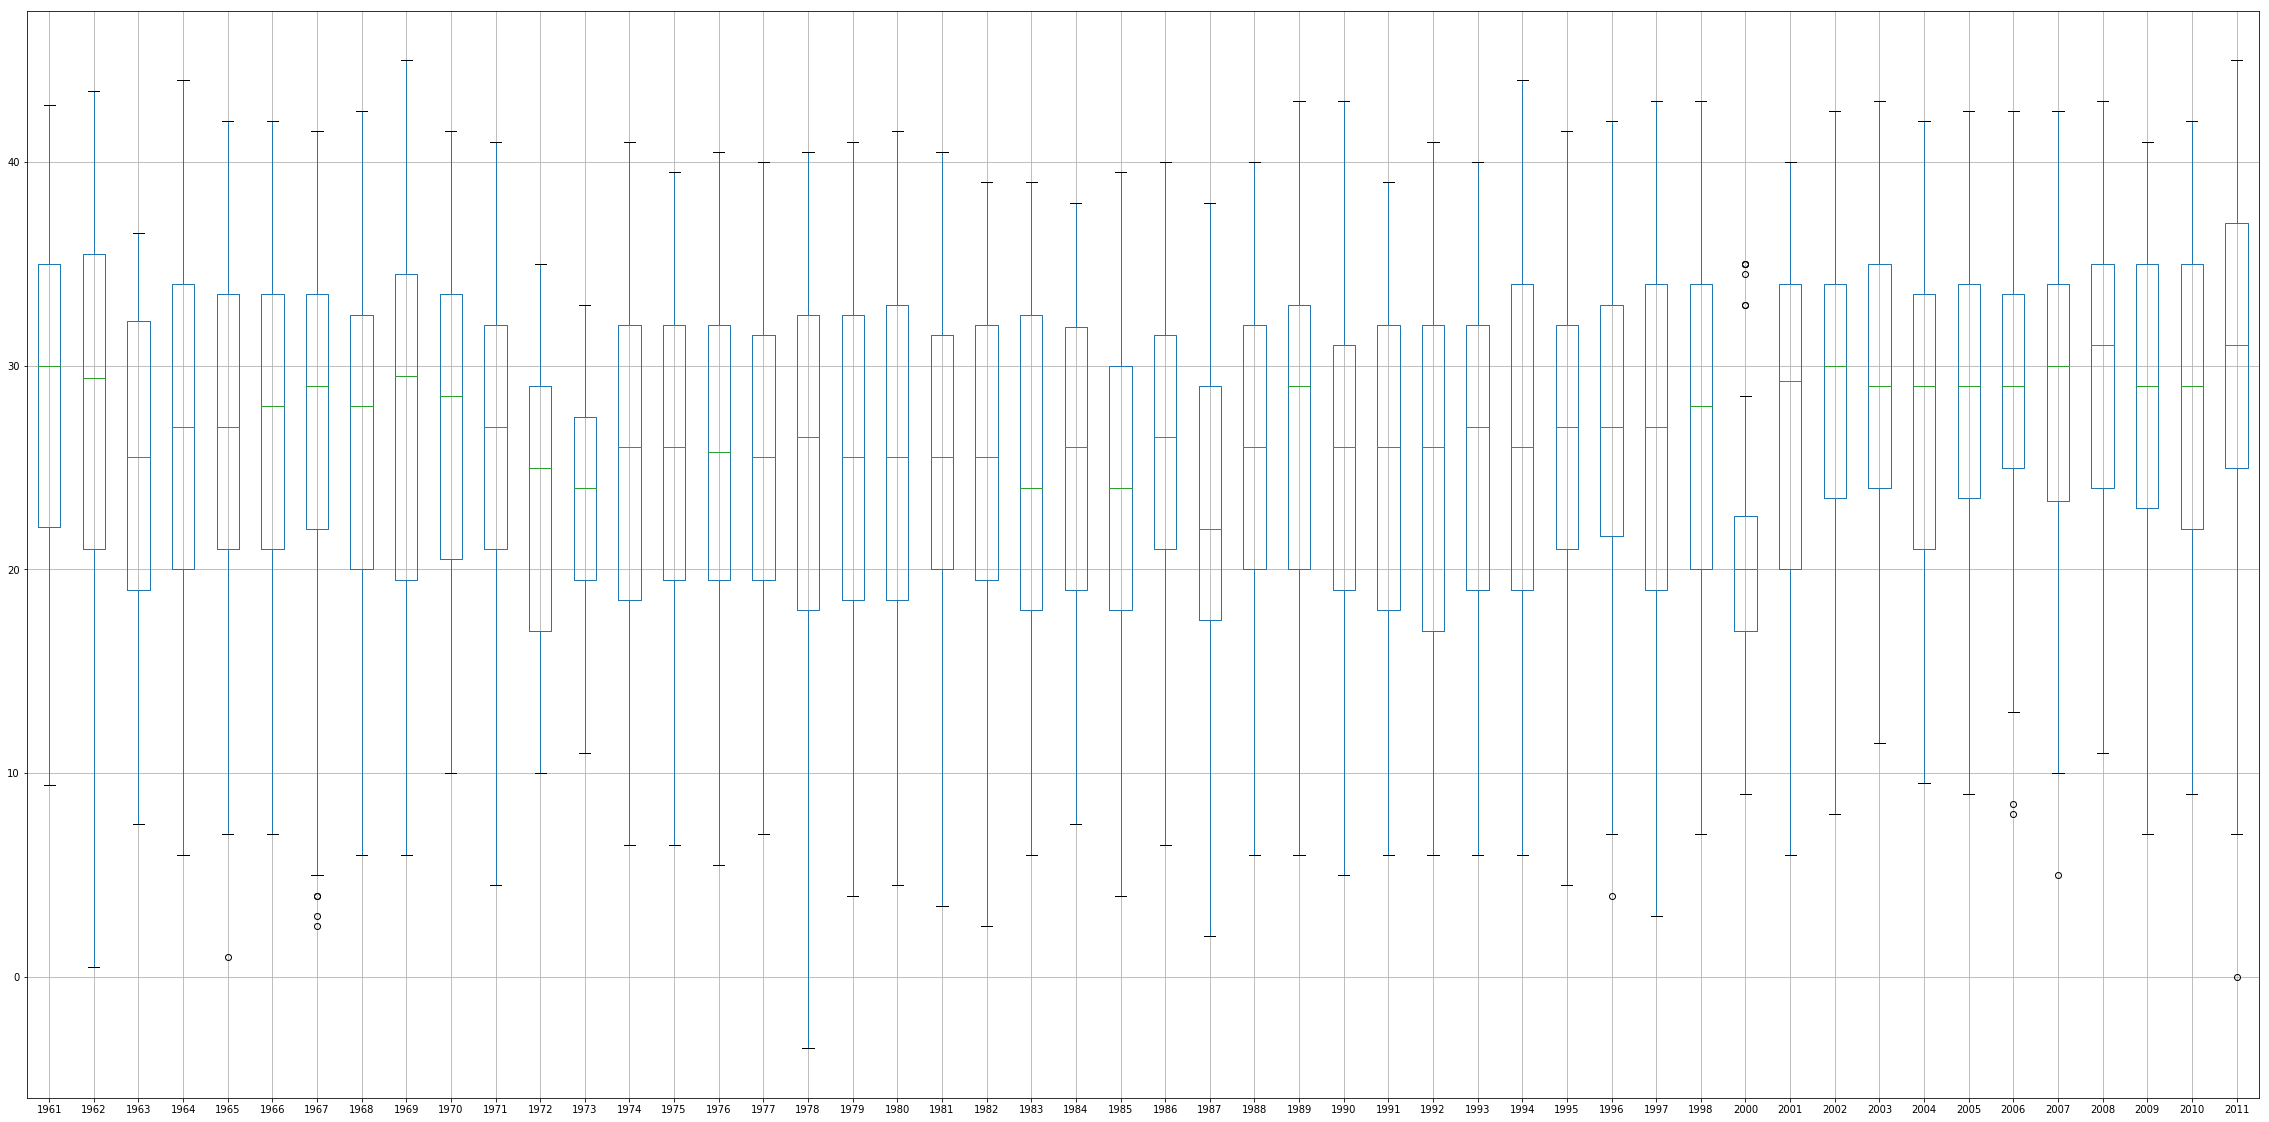

In [23]:
TmaxAño = df.filter(['TMAX','Año'])
TmaxAño = df.pivot(columns='Año',values='TMAX')


TmaxAño.boxplot(figsize=(40,20))


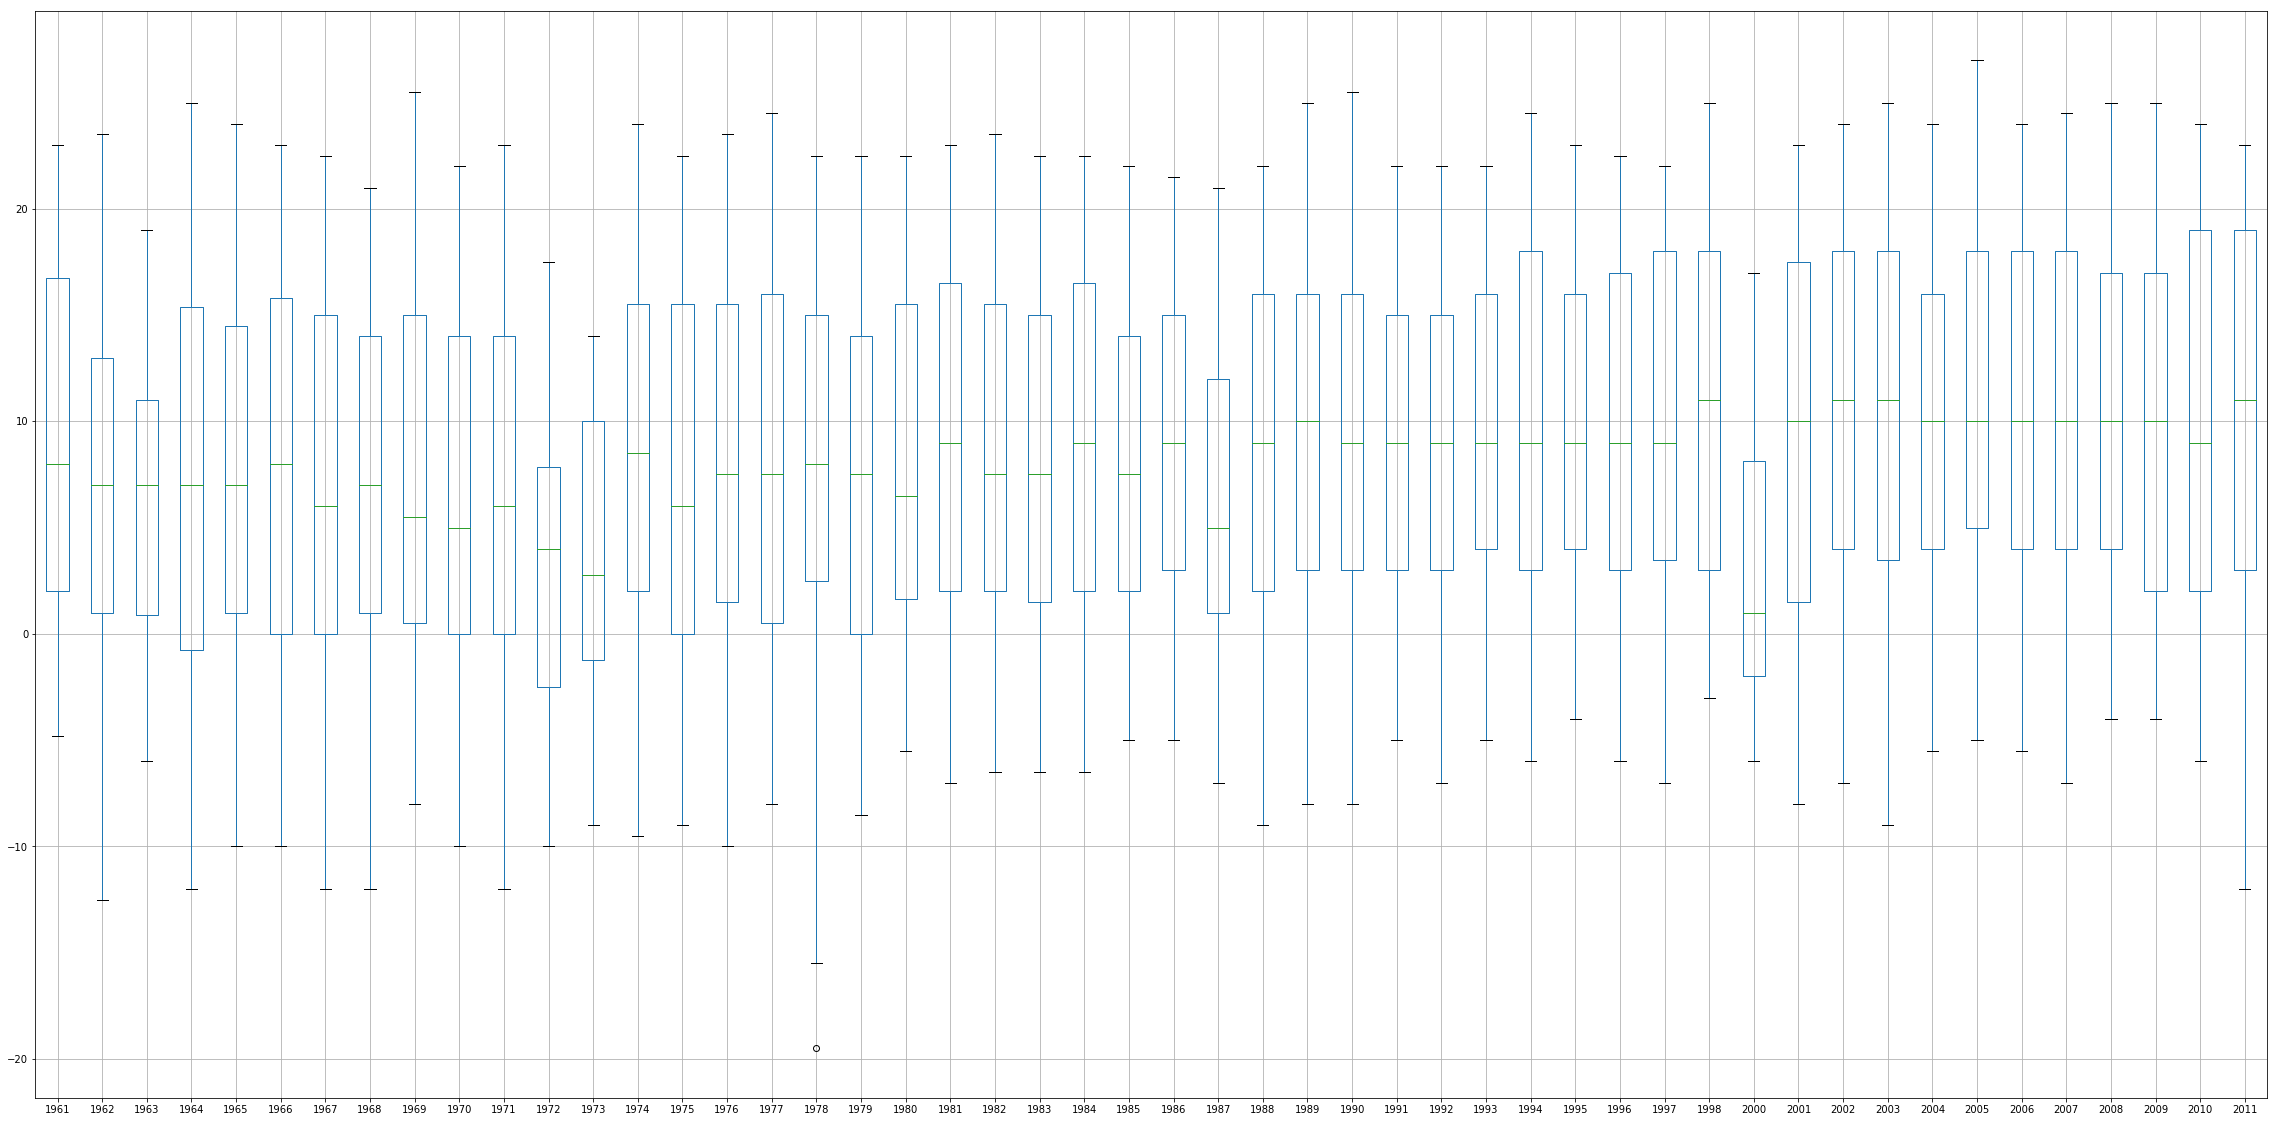

In [24]:
TminAño = df.filter(['TMIN','Año'])
TminAño = df.pivot(columns='Año',values='TMIN')
TminAño.boxplot(figsize=(40,20))
